In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict,RandomizedSearchCV
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,recall_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,auc
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
df = pd.read_csv('/content/drive/My Drive/creditcard_data.csv')

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<ipython-input-7-13c9d6cf8446>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=df,palette=['blue','red'])


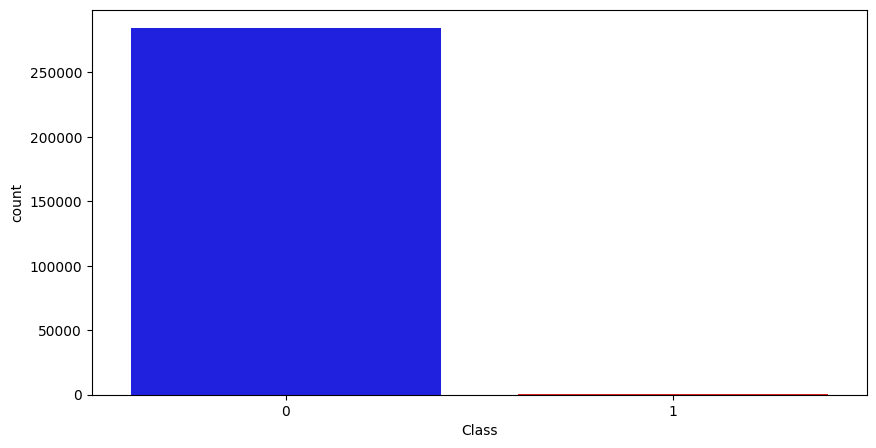

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class',data=df,palette=['blue','red'])
plt.show()

([<matplotlib.patches.Wedge at 0x78e0d9f39b10>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Non-Frauds'),
  Text(1.0999838018177286, -0.005969567707642625, 'Frauds')])

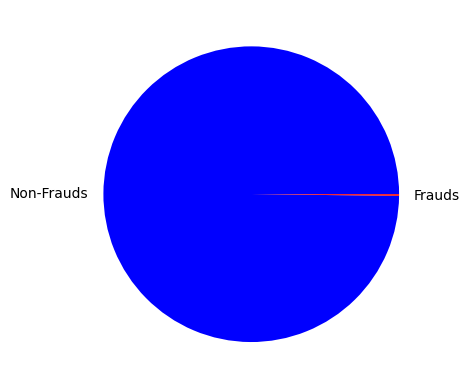

In [8]:
plt.pie((df['Class'].value_counts()).values,labels=['Non-Frauds','Frauds'],colors=['blue','red'])


<ipython-input-9-7a1d52a57579>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'],color='red')


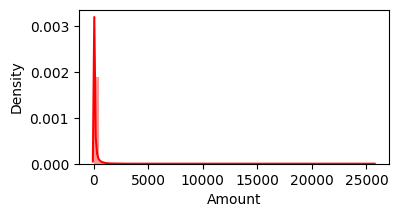

<ipython-input-9-7a1d52a57579>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


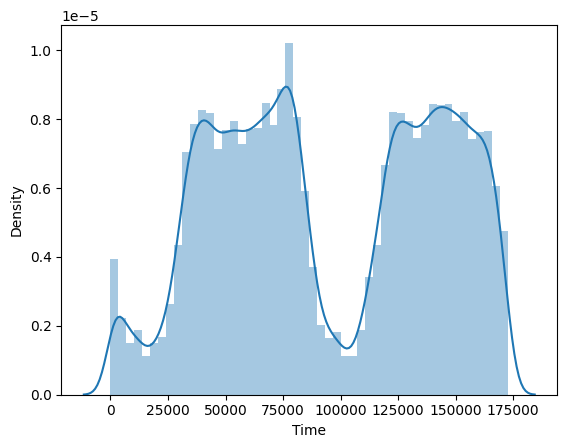

In [9]:
plt.figure(figsize=(4,2))
sns.distplot(df['Amount'],color='red')
plt.show()
sns.distplot(df['Time'])
plt.show()

In [143]:
columns = list(df.columns)
# classes = {0:'Non-Frauds',1:'Frauds'}
# plt.figure()
# for col in columns:
#   sns.boxplot(x = df['Class'].map(classes) ,y=col,data=df,palette=['blue','red'])
#   plt.show()



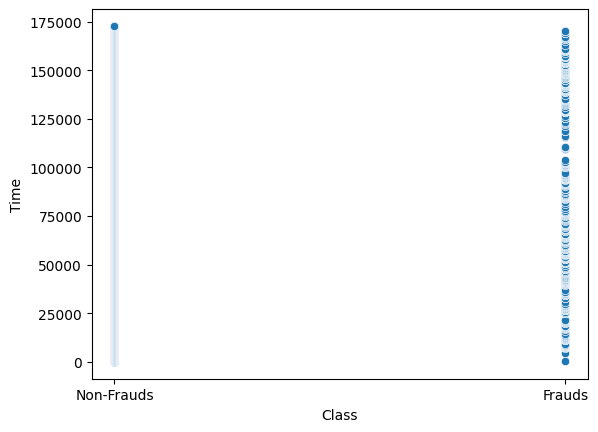

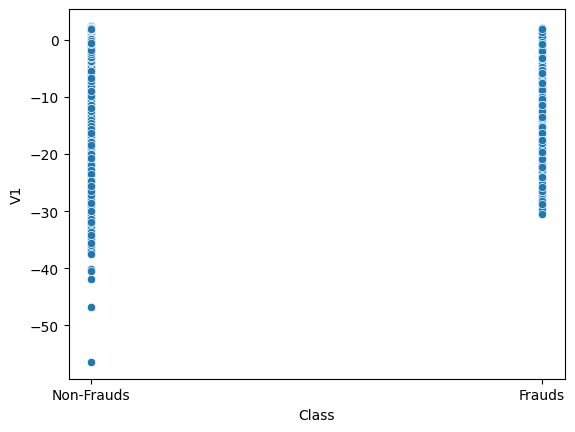

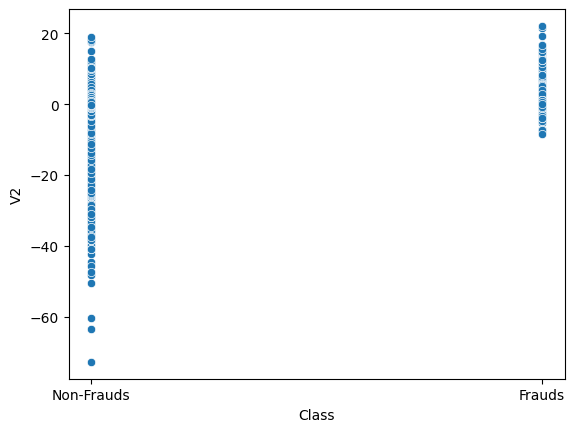

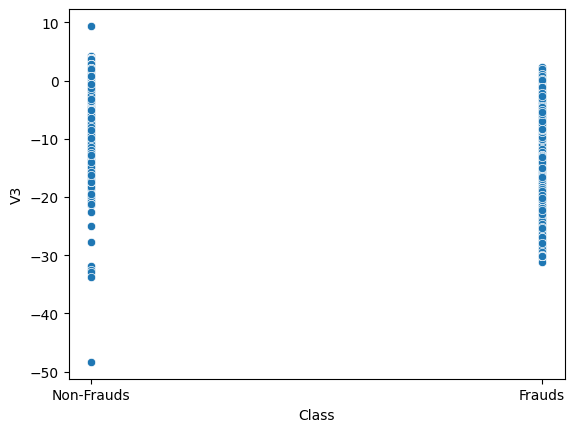

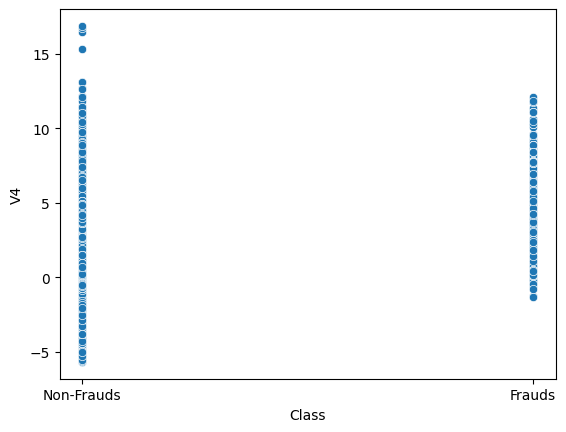

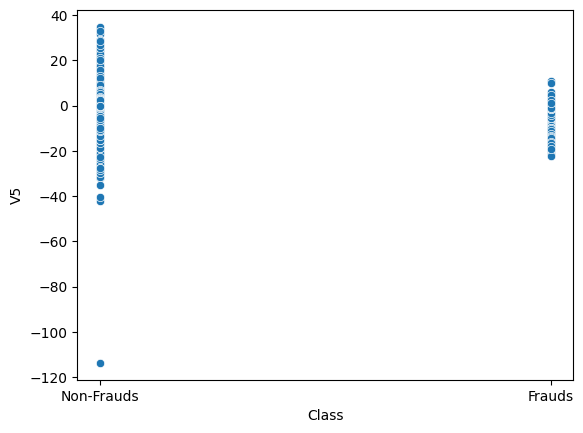

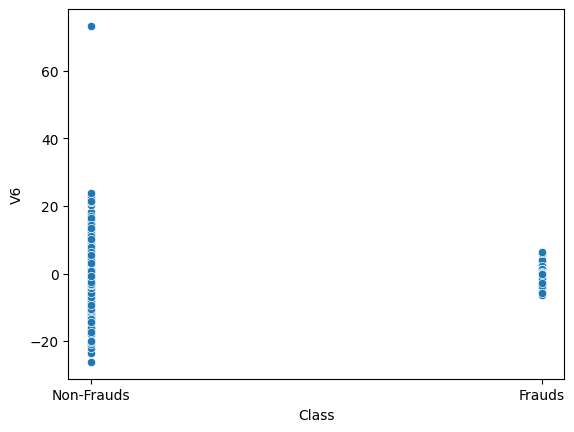

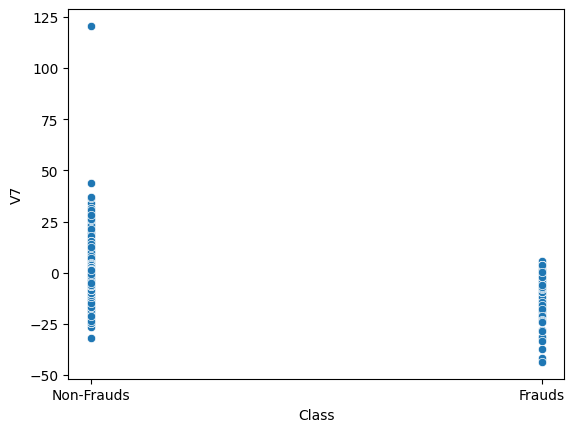

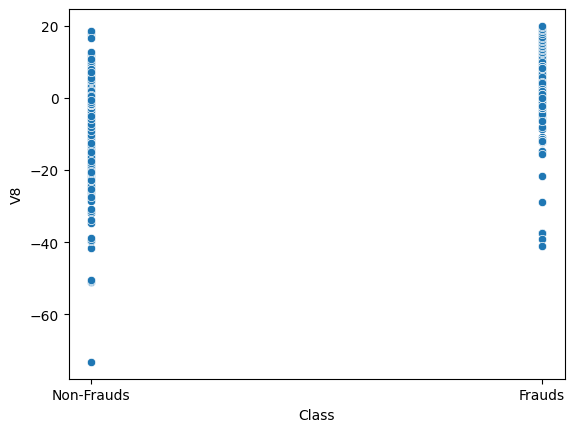

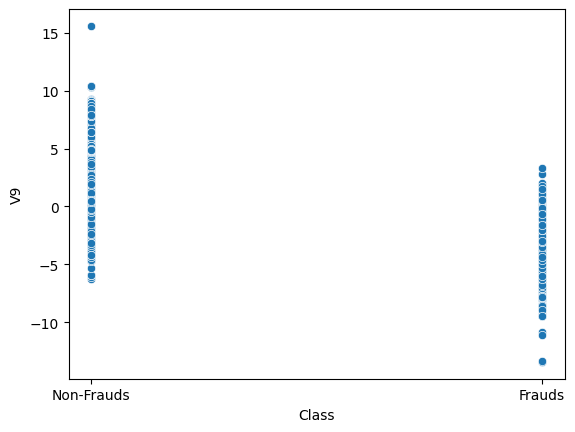

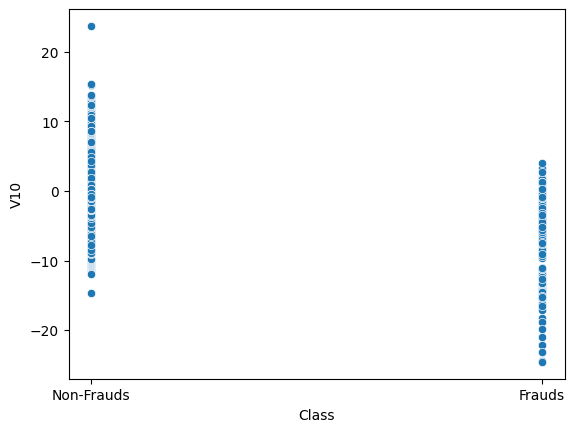

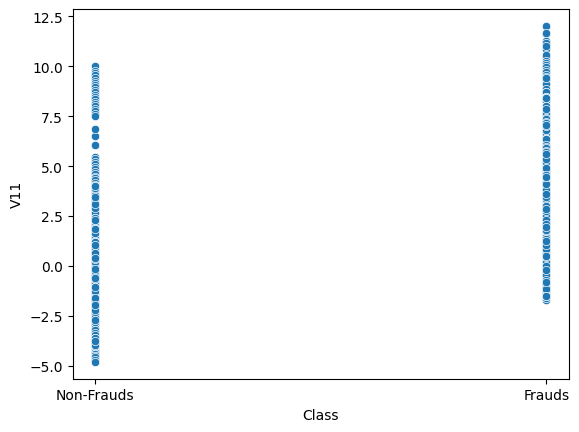

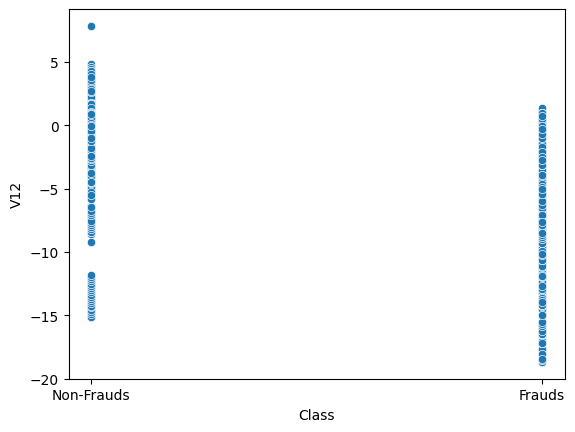

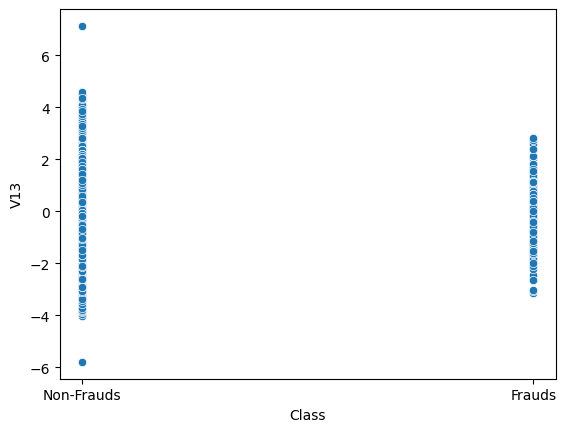

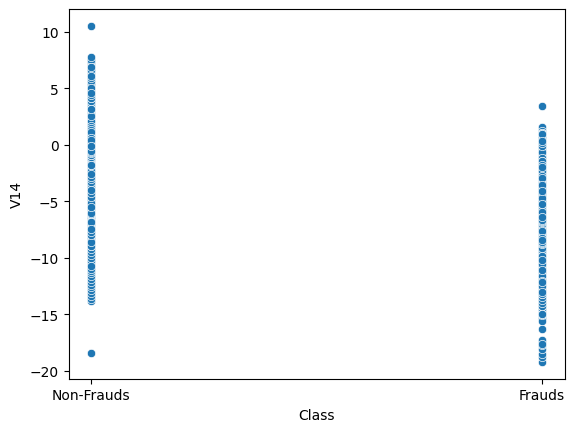

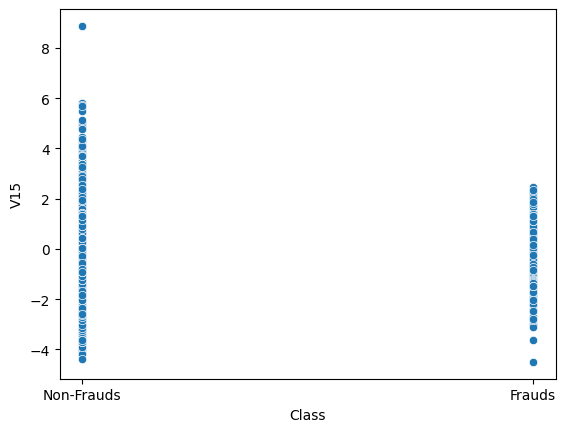

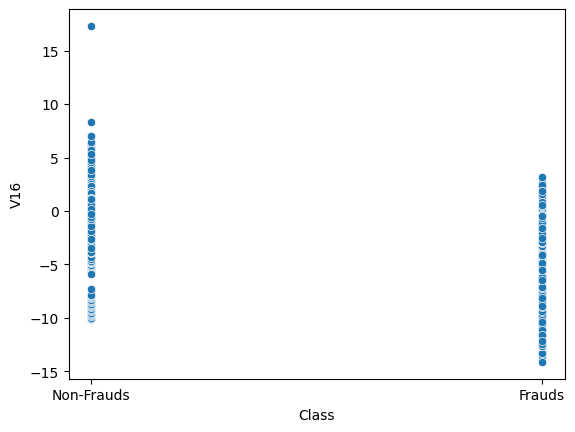

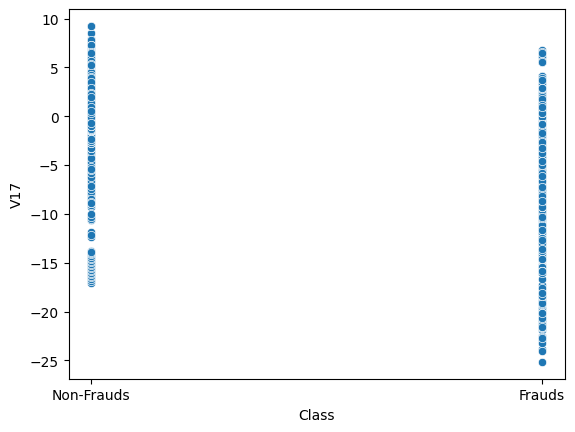

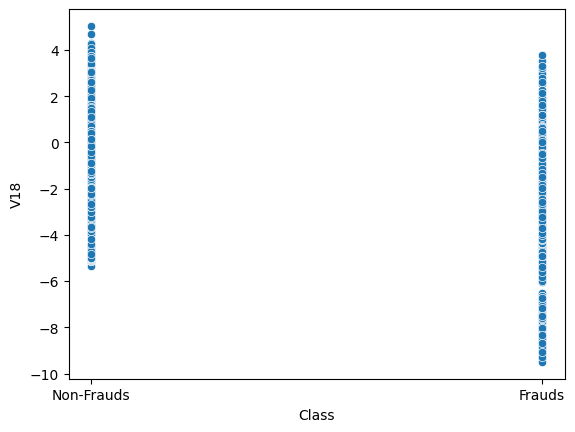

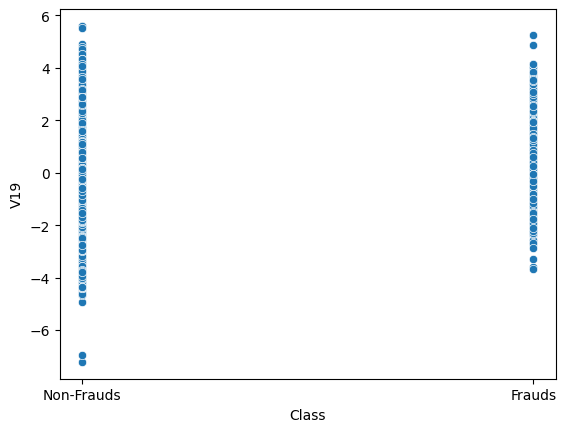

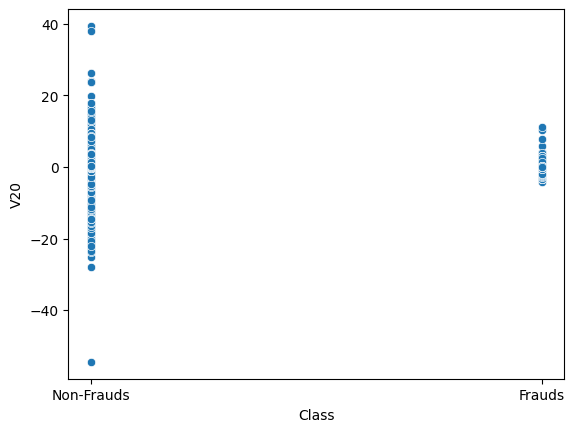

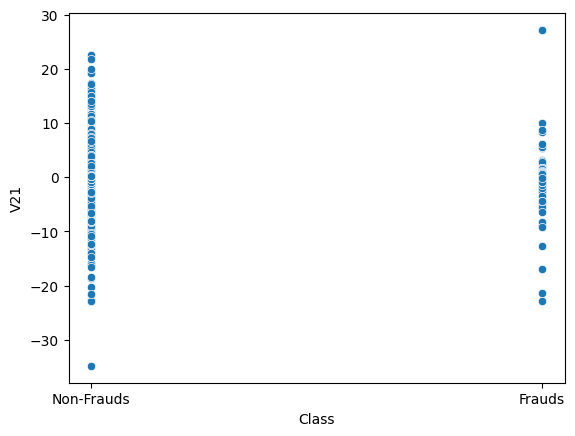

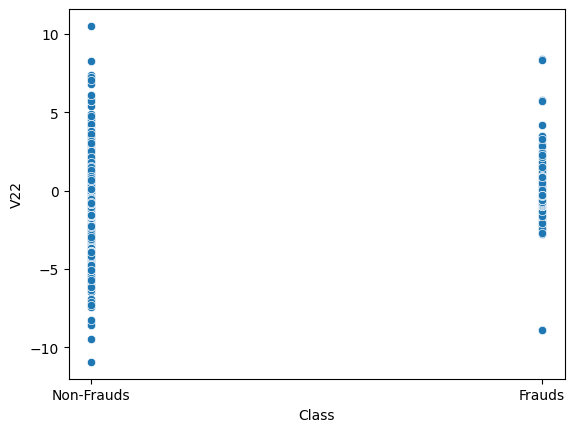

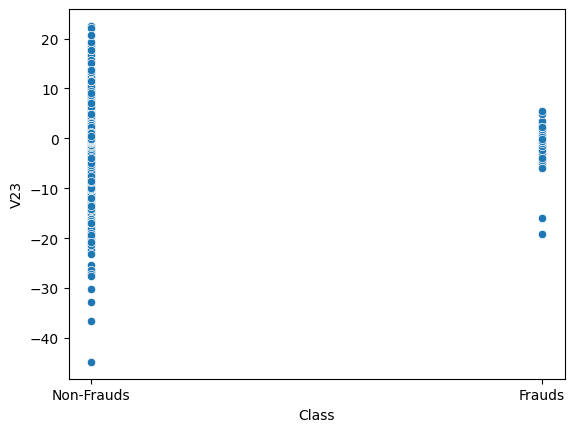

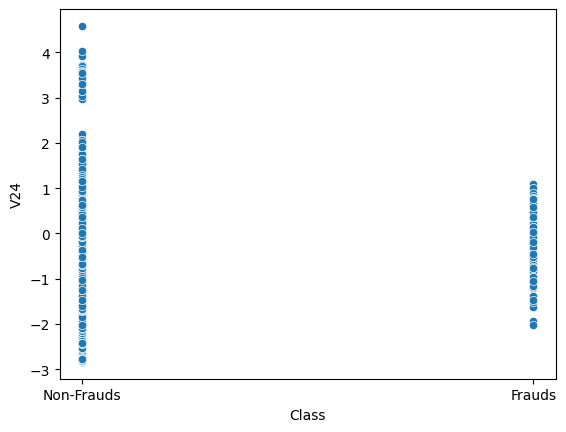

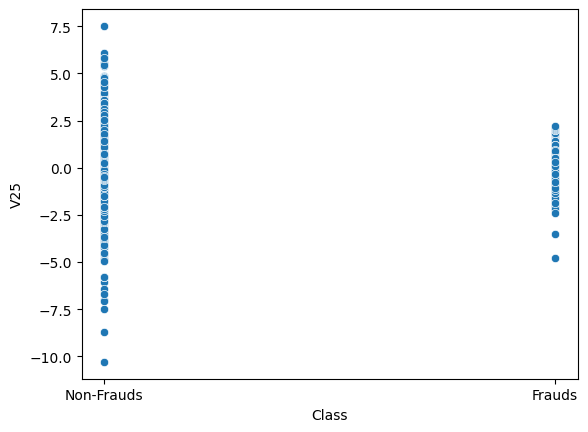

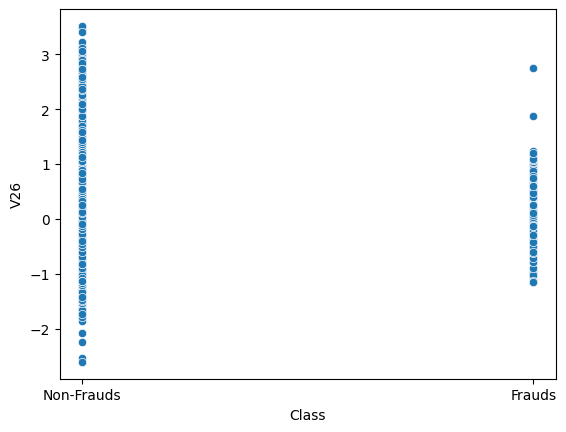

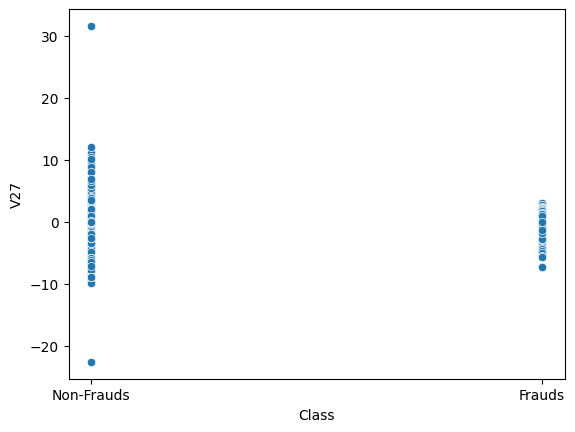

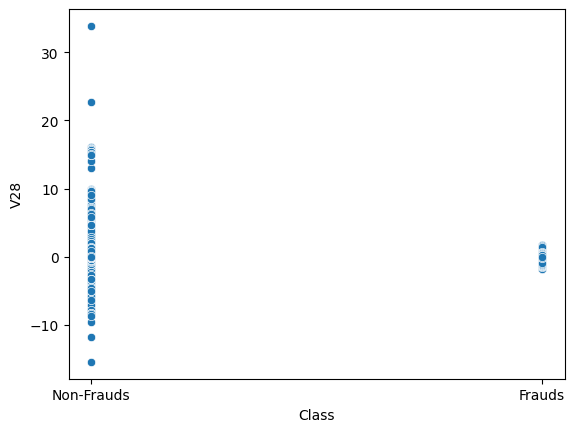

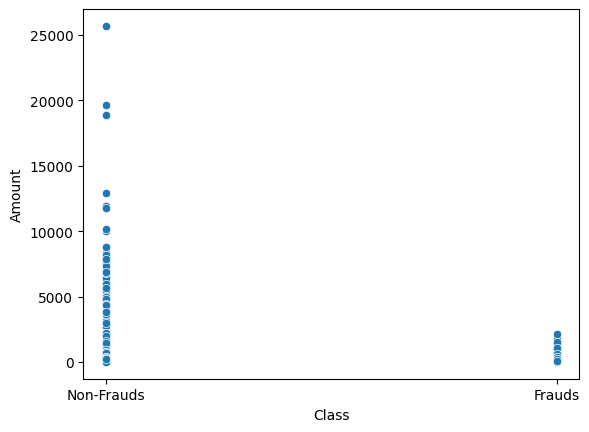

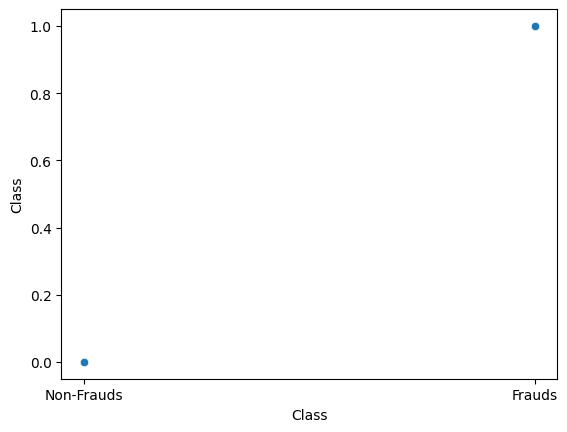

In [12]:
for col in columns :
  plt.figure()
  sns.scatterplot(x=df['Class'].map(classes),y=col,data=df)
  plt.show()


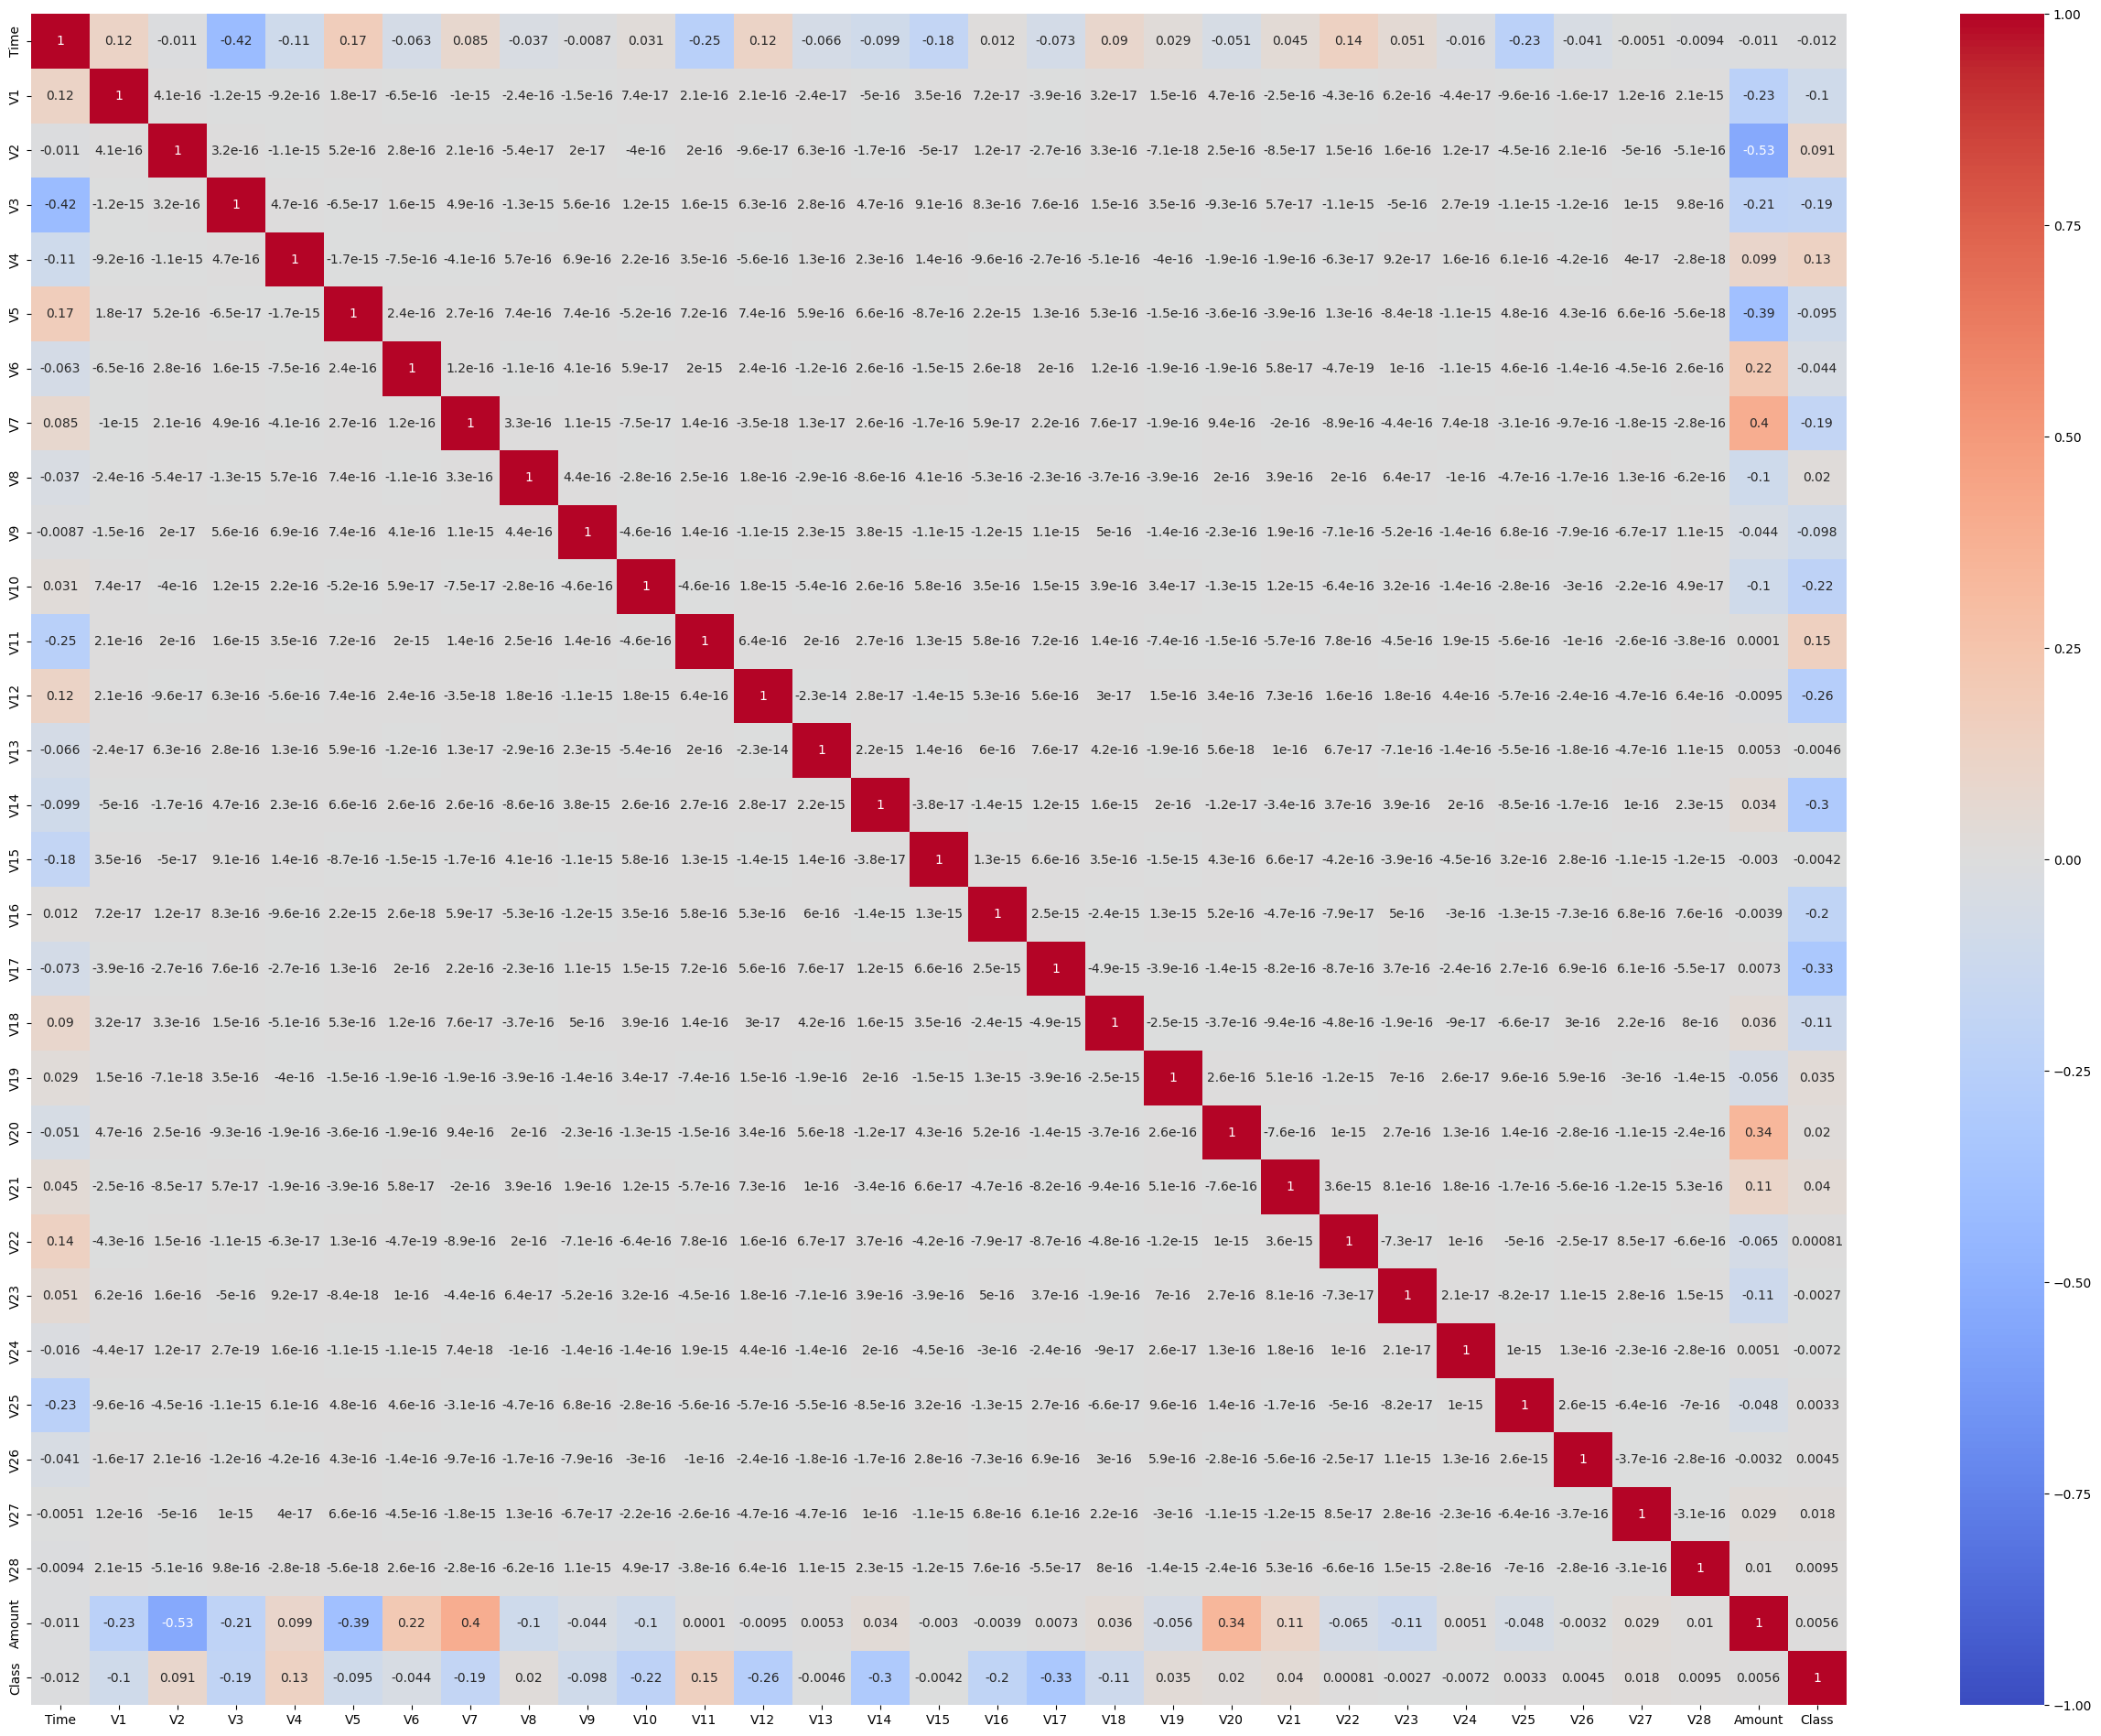

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(32,24))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [144]:
X_val = df.drop('Class',axis = 1)
y_val = df['Class']
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)
df_scaled = pd.DataFrame(data = X_val_scaled,columns=columns[:-1])
df_scaled['Class'] = y_val
X_val_scaled,y_val_scaled = df_scaled.drop('Class',axis=1),df_scaled['Class']





<Figure size 640x480 with 0 Axes>

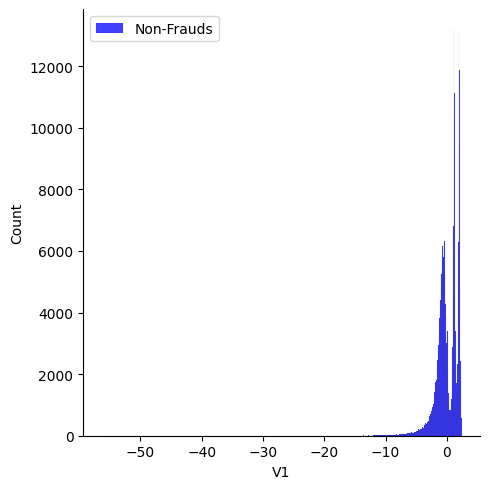

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

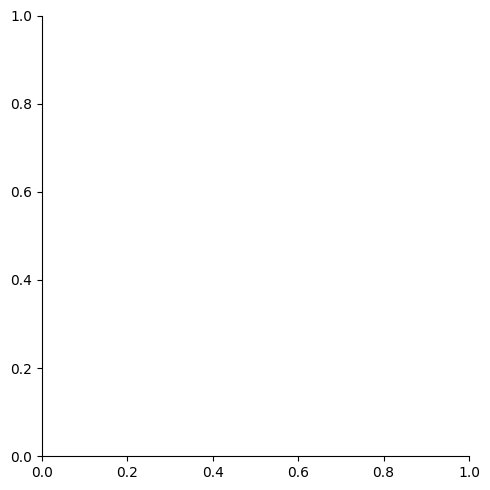

In [15]:
for i in columns[1:-2]:
  plt.figure()
  sns.displot(df[df['Class']==0][i],color='blue',label='Non-Frauds')
  plt.legend()
  plt.show()

In [145]:
train_X , test_X , train_y, test_y = train_test_split(X_val_scaled,y_val_scaled,test_size=0.2,stratify = y_val_scaled,random_state=42)
new_df = pd.DataFrame(data=train_X,columns=columns[:-1])
new_df['Class'] = train_y

In [146]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)
model.fit(new_df[new_df['Class']==0].drop('Class',axis=1))

outliers = model.predict(new_df[new_df['Class']==0].drop('Class',axis=1))
outliers = pd.Series(outliers)
new_df['outlier'] = outliers

df_clean = new_df[new_df['outlier'] != -1].drop(columns=['outlier'])
print(df_clean)
X_rus , y_rus = df_clean.drop('Class',axis=1),df_clean['Class']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


            Time        V1        V2        V3        V4        V5        V6  \
265518  1.413095  0.993901 -0.455716 -0.893736 -0.467297  1.088809  3.021112   
180305  0.624644  1.039035 -0.029601 -2.017272  0.175119  2.132584  2.476000   
42664  -1.129186 -0.506419  0.365282  0.469563 -0.700931 -0.598327  1.468368   
198723  0.796203  1.166961 -0.908517 -0.493035 -1.178161 -1.010069 -0.262964   
82325  -0.746606 -0.229105 -0.612509  0.076440 -2.440100  0.518582 -0.110706   
...          ...       ...       ...       ...       ...       ...       ...   
233802  1.113883  1.017956 -0.313005 -0.408981  0.091707 -0.206578  0.296520   
85418  -0.717019 -0.764762  0.398425  1.043077 -0.017153  0.423619  0.978054   
29062  -1.253217  0.546169  0.043665  0.327478  1.063178 -0.275514 -0.277904   
13766  -1.482496  0.653735  0.182029  0.219650  0.362125  0.047131 -0.109470   
17677  -1.389125 -0.305367  0.469350  1.202567  0.221059 -0.069676 -0.293824   

              V7        V8        V9  .

In [147]:
# Undersamlping the training data

X_rus,y_rus = RandomUnderSampler(random_state=42).fit_resample(train_X,train_y)
X_rus,y_rus = X_rus.values,y_rus.values
new_df = pd.DataFrame(data=X_rus,columns=columns[:-1])
new_df['Class'] = y_rus


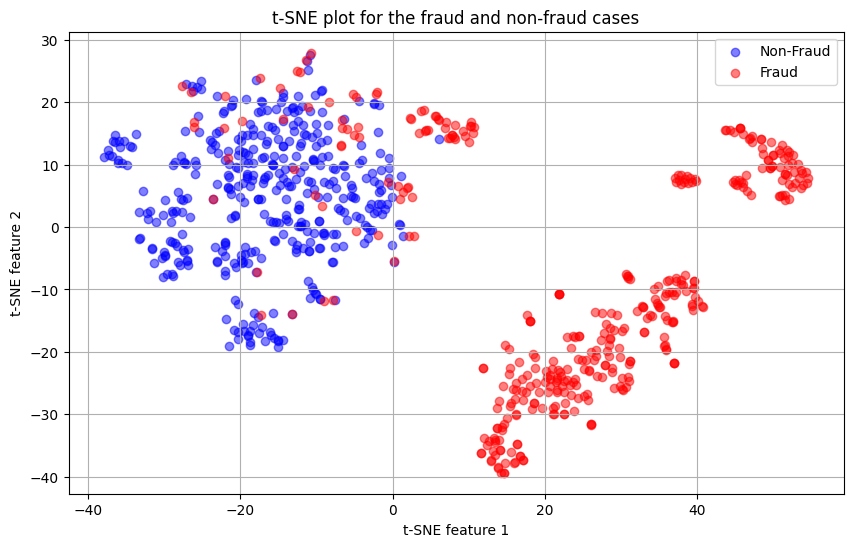

In [148]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_rus)

plt.figure(figsize=(10, 6))

plt.scatter(X_tsne[y_rus == 0, 0], X_tsne[y_rus == 0, 1],
            c='blue', label='Non-Fraud', alpha=0.5)
plt.scatter(X_tsne[y_rus == 1, 0], X_tsne[y_rus == 1, 1],
            c='red', label='Fraud', alpha=0.5)

plt.title('t-SNE plot for the fraud and non-fraud cases')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
model = LogisticRegression().fit(X_rus,y_rus)
param_gird = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100],'solver':['liblinear','saga']}
grid_search = GridSearchCV(estimator=model,param_grid=param_gird,scoring='accuracy',cv=5,verbose=2,n_jobs=-1).fit(X_rus,y_rus)
y_pred = grid_search.predict(X_rus)
best_param_log = grid_search.best_params_
print(classification_report(y_rus,y_pred))
print(accuracy_score(y_rus,y_pred))
print('Best parameters for logestic regression are : ',best_param_log)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       394
           1       0.99      0.90      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788

0.949238578680203
Best parameters for logestic regression are :  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [150]:
model = KNeighborsClassifier().fit(X_rus,y_rus)
param_grid = {'n_neighbors':[3,5,7,9,11,13,15,17,19],'weights':['uniform','distance']}
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2,n_jobs=-1).fit(X_rus,y_rus)
best_param_KNN = grid_search.best_params_
y_pred = model.predict(X_rus)
print(classification_report(y_rus,y_pred))
print(accuracy_score(y_rus,y_pred))
print('Best parameters for KNN Classifier is : ',best_param_KNN)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       394
           1       0.99      0.91      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788

0.9517766497461929
Best parameters for KNN Classifier is :  {'n_neighbors': 7, 'weights': 'distance'}


In [151]:
model = SVC().fit(X_rus,y_rus)
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid']}
gird_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2,n_jobs=-1).fit(X_rus,y_rus)
best_param_SVC = gird_search.best_params_
y_pred = model.predict(X_rus)
print(classification_report(y_rus,y_pred))
print(accuracy_score(y_rus,y_pred))
print('Best parameters for SVC : ',best_param_SVC)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       394
           1       0.99      0.89      0.94       394

    accuracy                           0.94       788
   macro avg       0.95      0.94      0.94       788
weighted avg       0.95      0.94      0.94       788

0.9428934010152284
Best parameters for SVC :  {'C': 10, 'kernel': 'rbf'}


In [152]:
model = DecisionTreeClassifier().fit(X_rus,y_rus)
grid_param={'criterion':['gini','entropy'],'max_depth':range(2,10)}
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=5,verbose=2,n_jobs=-1).fit(X_rus,y_rus)
best_param_DT = grid_search.best_params_
y_pred = model.predict(X_rus)
print(classification_report(y_rus,y_pred))
print(accuracy_score(y_rus,y_pred))
print('Best parameters for Decision Trees Classifier are : ',best_param_DT)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

1.0
Best parameters for Decision Trees Classifier are :  {'criterion': 'entropy', 'max_depth': 3}


Roc score for  Logistic Regression is  0.9847393645803808
Roc score for  KNN is  1.0
Roc score for  SVC is  0.9917931407663172
Roc score for  Decision Tree is  0.9849970367698214


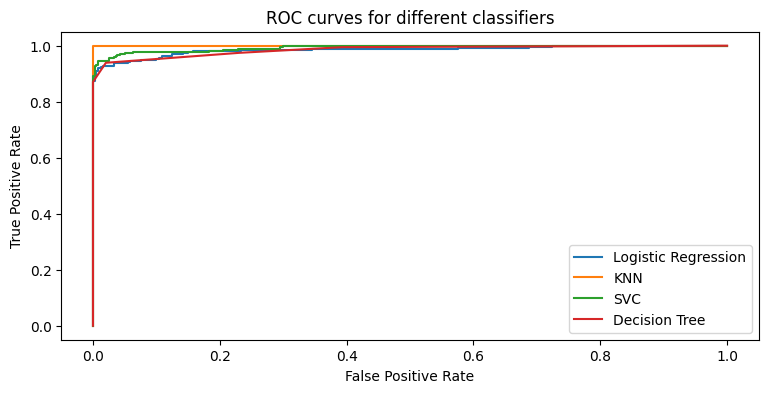

In [153]:
#ROC curves -->
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance'),
    'SVC': SVC(C=10, kernel='rbf',probability=True),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=3)
}
plt.figure(figsize=(9,4))
for name,model in models.items():
  model.fit(X_rus,y_rus)
  y_pred = model.predict_proba(X_rus)[:,1]
  fpr,tpr,thresholds = roc_curve(y_rus,y_pred)
  plt.plot(fpr,tpr,label=name)
  print('Roc score for ',name,'is ',roc_auc_score(y_rus,y_pred))
plt.title('ROC curves for different classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Metrics for  Logistic Regression  : 

Metrics on balanced training dataset are : 
Accuracy score :  0.949238578680203
Precision score :  0.994413407821229
Recall score :  0.9035532994923858
F1 score :  0.9468085106382979 

Metrics on imbalanced training dataset are : 
Accuracy score :  0.9708178805767078
Precision score :  0.051098033586909716
Recall score :  0.9035532994923858
F1 score :  0.09672598831680479


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


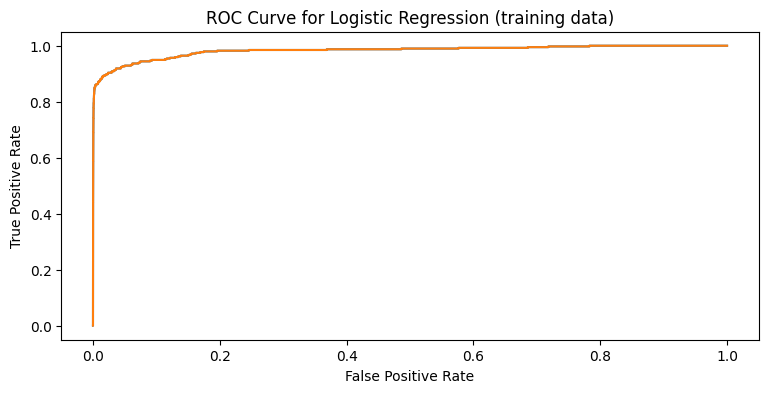

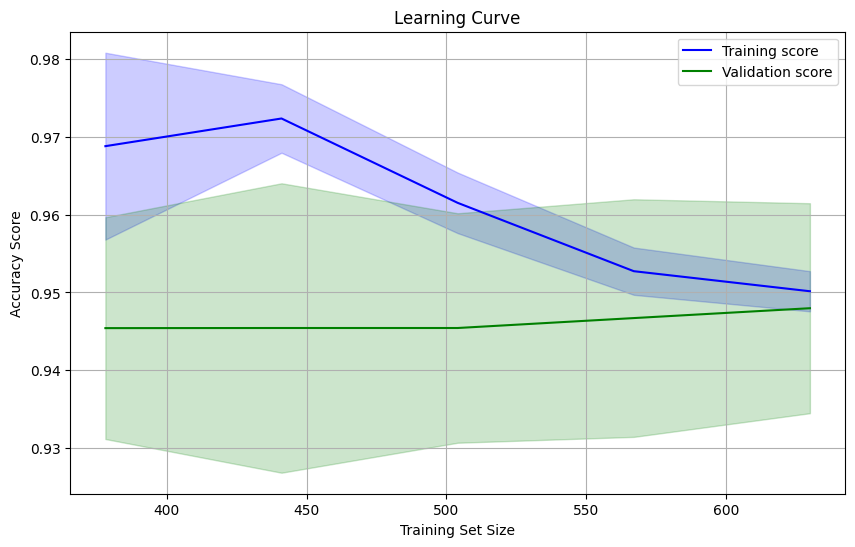

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


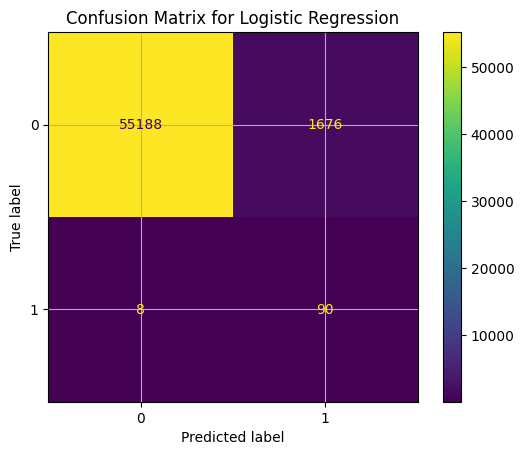

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Precision-Recall AUC: 0.67


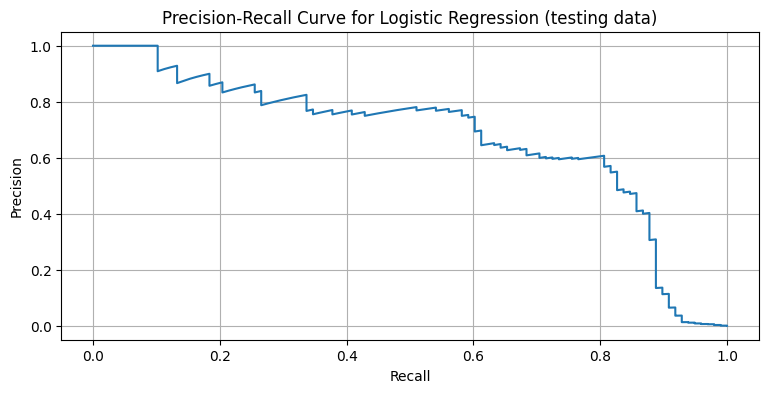

******************************************




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Metrics for  KNN  : 

Metrics on balanced training dataset are : 
Accuracy score :  1.0
Precision score :  1.0
Recall score :  1.0
F1 score :  1.0 

Metrics on imbalanced training dataset are : 
Accuracy score :  0.9778884768153788
Precision score :  0.07253313696612666
Recall score :  1.0
F1 score :  0.1352557500858222


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


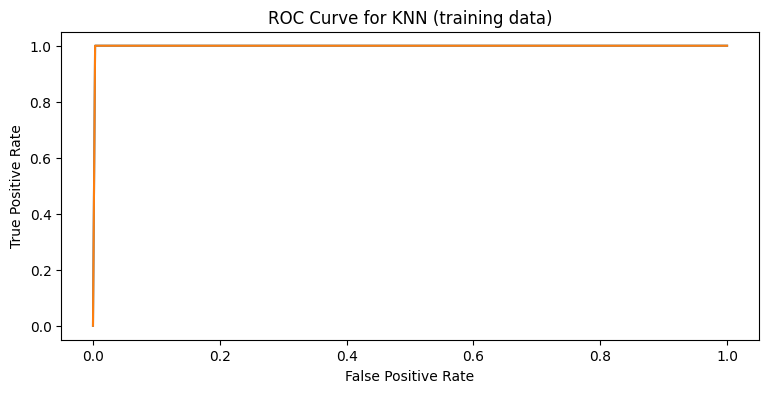

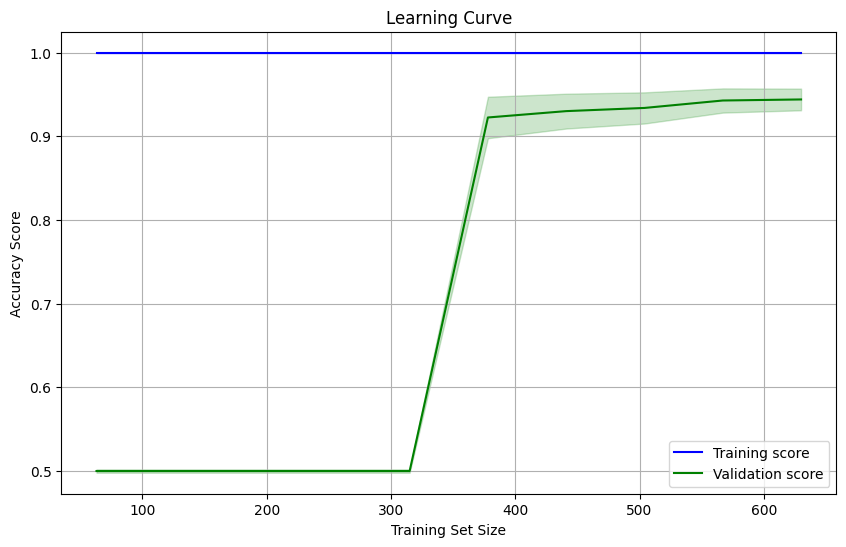

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


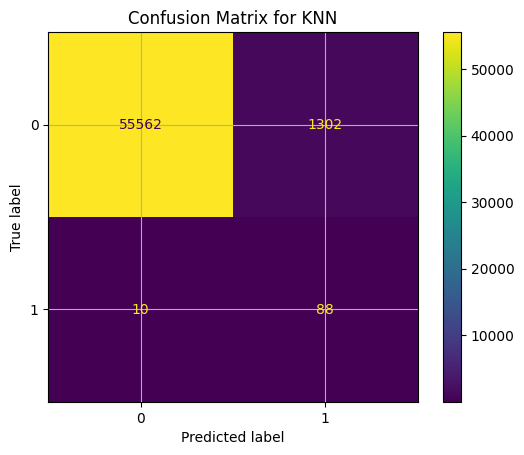

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Precision-Recall AUC: 0.56


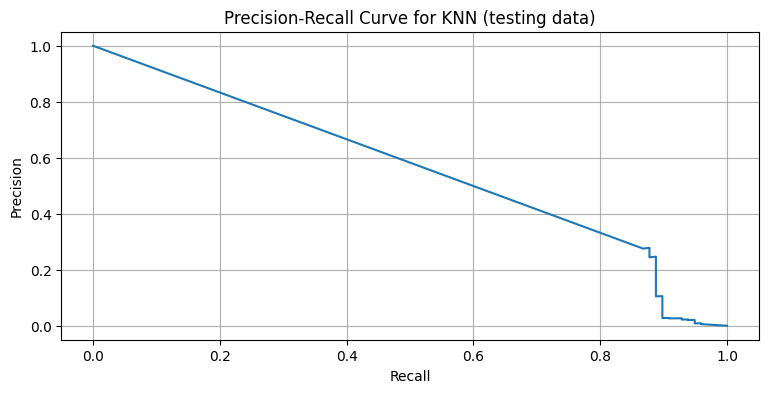

******************************************




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Metrics for  SVC  : 

Metrics on balanced training dataset are : 
Accuracy score :  0.9631979695431472
Precision score :  0.994579945799458
Recall score :  0.9314720812182741
F1 score :  0.9619921363040629 

Metrics on imbalanced training dataset are : 
Accuracy score :  0.9681625666571573
Precision score :  0.04832762707400579
Recall score :  0.9314720812182741
F1 score :  0.09188783174762143


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


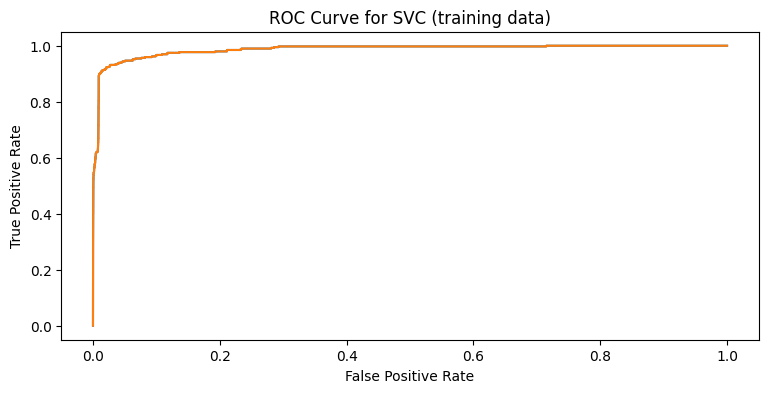

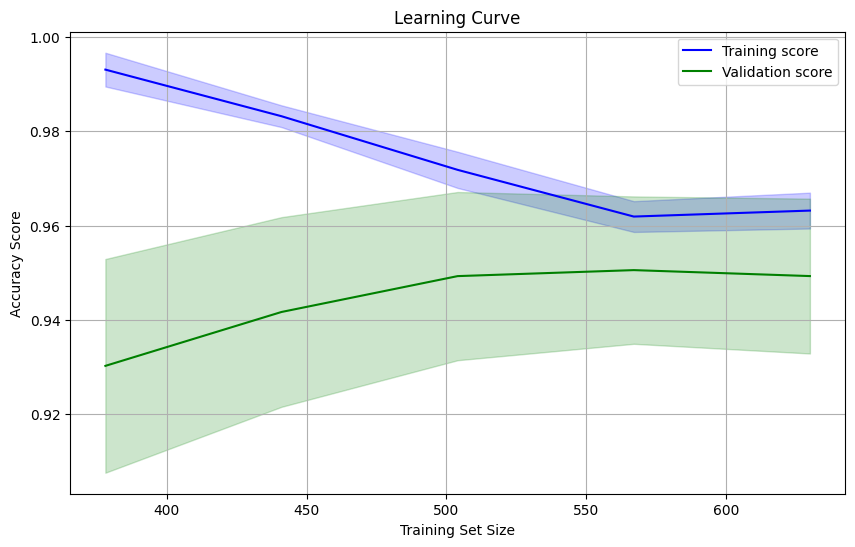

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


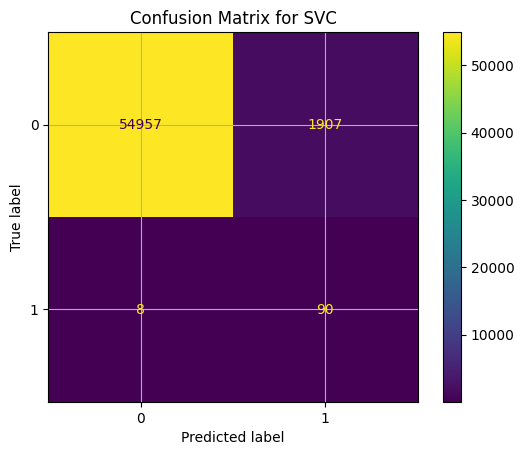

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Precision-Recall AUC: 0.38


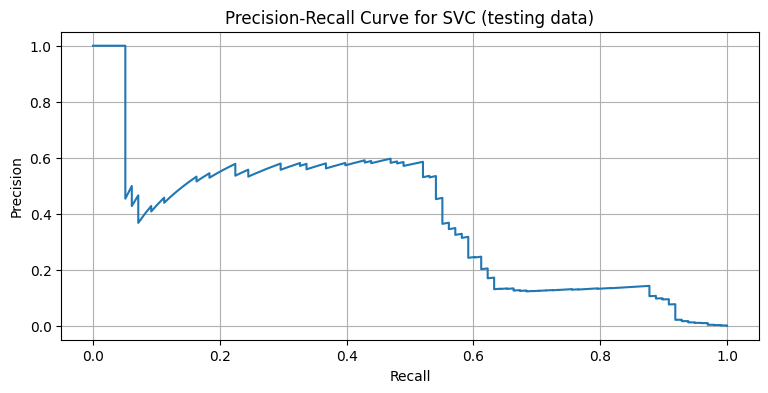

******************************************


Metrics for  Decision Tree  : 

Metrics on balanced training dataset are : 
Accuracy score :  0.9593908629441624
Precision score :  0.9788359788359788
Recall score :  0.9390862944162437
F1 score :  0.9585492227979275 

Metrics on imbalanced training dataset are : 
Accuracy score :  0.9372512014746868
Precision score :  0.025268046165403263


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Recall score :  0.9390862944162437
F1 score :  0.04921194387178293


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


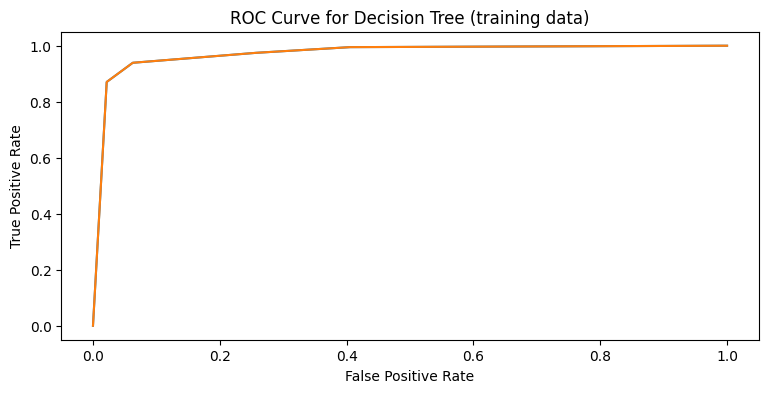

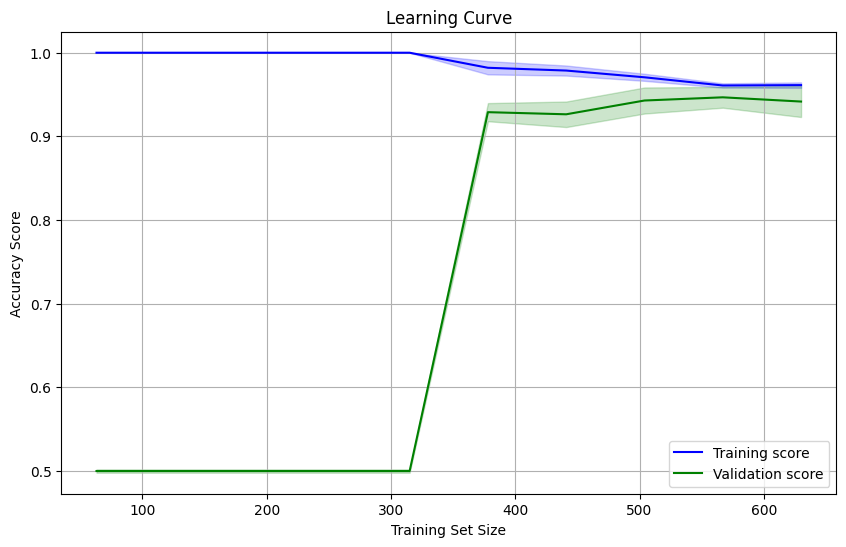

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


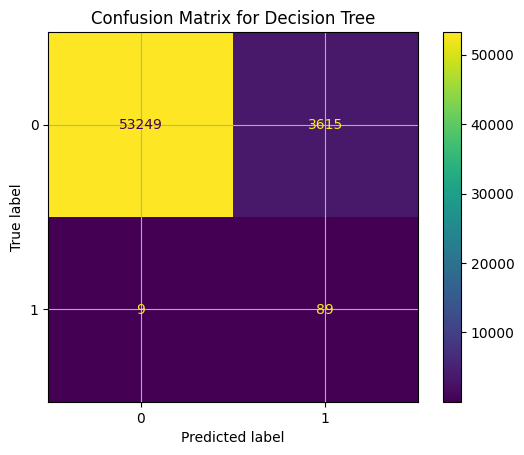

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.02      0.91      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.94      0.97     56962

Precision-Recall AUC: 0.46


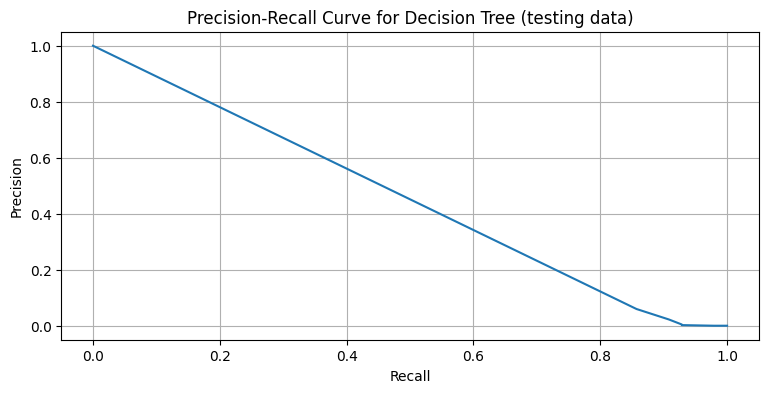

******************************************




In [155]:
def comparisons(dict_of_est):

  for name,est in  dict_of_est.items():
    model = est.fit(X_rus,y_rus)
    y_pred_ib = model.predict(train_X)
    y_pred_b = model.predict(X_rus)

    print('Metrics for ',name,' : \n')

    print('Metrics on balanced training dataset are : ')
    print('Accuracy score : ',accuracy_score(y_rus,y_pred_b))
    print('Precision score : ',precision_score(y_rus,y_pred_b))
    print('Recall score : ',recall_score(y_rus,y_pred_b))
    print('F1 score : ',f1_score(y_rus,y_pred_b),'\n')

    print('Metrics on imbalanced training dataset are : ')
    print('Accuracy score : ',accuracy_score(train_y,y_pred_ib))
    print('Precision score : ',precision_score(train_y,y_pred_ib))
    print('Recall score : ',recall_score(train_y,y_pred_ib))
    print('F1 score : ',f1_score(train_y,y_pred_ib))

    if hasattr(model, "predict_proba"):
            y_proba_train = model.predict_proba(train_X)[:, 1]
            y_proba_test = model.predict_proba(test_X)[:,1]
    else:
            y_proba_train = model.decision_function(train_X)
            y_proba_test = model.predict_proba(test_X)

    plt.figure(figsize=(9,4))
    fpr,tpr,thresholds = roc_curve(train_y,y_proba_train)
    plt.plot(fpr,tpr,label=name)
    roc_auc = roc_auc_score(train_y, y_proba_train)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.title(f'ROC Curve for {name} (training data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    train_sizes, train_scores, validation_scores = learning_curve(
    model, X_rus, y_rus, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.plot(train_sizes, validation_mean, label='Validation score', color='green')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.2)

    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


    y_pred_test = model.predict(test_X)
    cm = confusion_matrix(test_y,y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.grid(True)
    plt.show()
    print(classification_report(test_y,y_pred_test))

    plt.figure(figsize=(9,4))
    precision,recall,thresholds = precision_recall_curve(test_y,y_proba_test)
    pr_auc = auc(recall,precision)
    print(f"Precision-Recall AUC: {pr_auc:.2f}")
    plt.plot(recall,precision,label=name)
    plt.title(f'Precision-Recall Curve for {name} (testing data)')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

    print('*'*42)
    print('\n')



estimators = {'Logistic Regression':LogisticRegression(C=0.1, penalty='l1', solver='liblinear',class_weight='balanced'),
              'KNN':KNeighborsClassifier(n_neighbors=7, weights='distance'),
              'SVC':SVC(C=10, kernel='rbf',probability=True,class_weight='balanced'),
              'Decision Tree':DecisionTreeClassifier(criterion='entropy',max_depth=3,class_weight='balanced')}
comparisons(estimators)